<a href="https://www.kaggle.com/code/aabdollahii/femalecancerproject-97-acc?scriptVersionId=258265373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loading data and understanding about data

In [1]:
import warnings # ignore all the warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# cleaning unuseful data 

This is a breast cancer data set with a lot of columns. I don't know anything about breast cancer and maybe correlation helps me!

In [3]:
df = df.drop(['id','Unnamed: 32'], axis=1)

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# data Encoding

In [5]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
df['diagnosis'].unique()
# Ok then we only have B and M (nothing to be worry about)

array(['M', 'B'], dtype=object)

All of the data is float except target feature --> diagnosis  : we need to encode it with map fucntion 

In [7]:
#I did not convert diagnosis and palce encoded values in another column(just in case)
df['diagnosis-enc'] = df['diagnosis'].map({'M':1, 'B':0})

In [8]:
df['diagnosis-enc'].unique()
#checking is always GOOD

array([1, 0])

In [9]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

# Null Values

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis-enc              0
dtype: int64

no null value we are so happy

# dropping Dup

In [11]:
df.duplicated().any()

# I have to remmber that -->any() always return Bool

False

everything is FINE

# Dataset overview

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis-enc
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

* 62.7% benign-37.3% malignant
* Your model will try to optimize for accuracy, so if it's not handled carefully, it might learn to just predict the majority class.

# feature distro

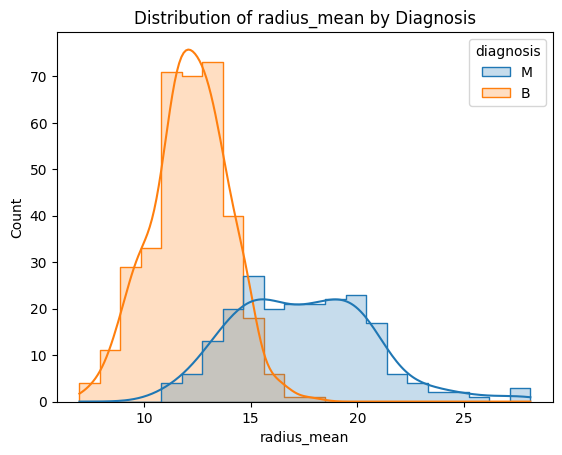

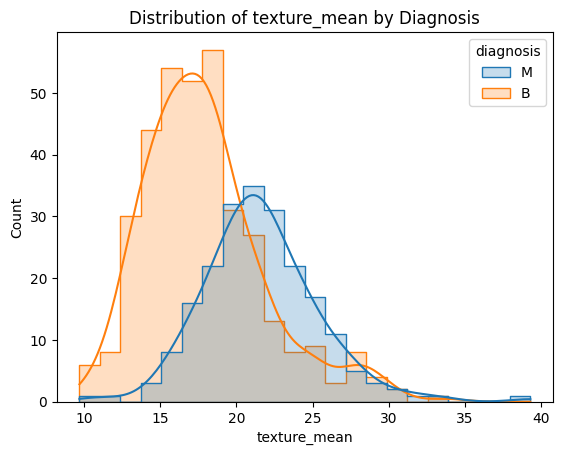

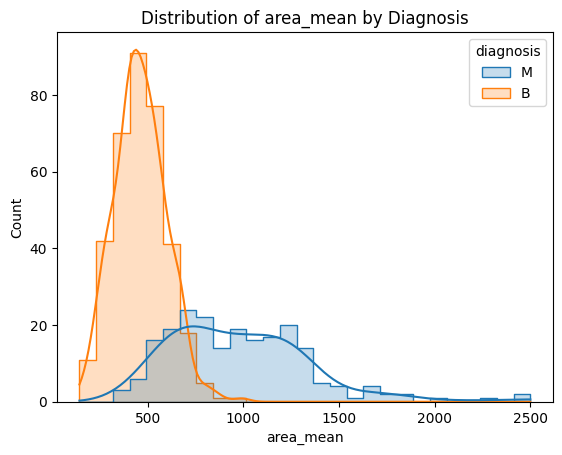

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element='step')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.show()


# Correlation

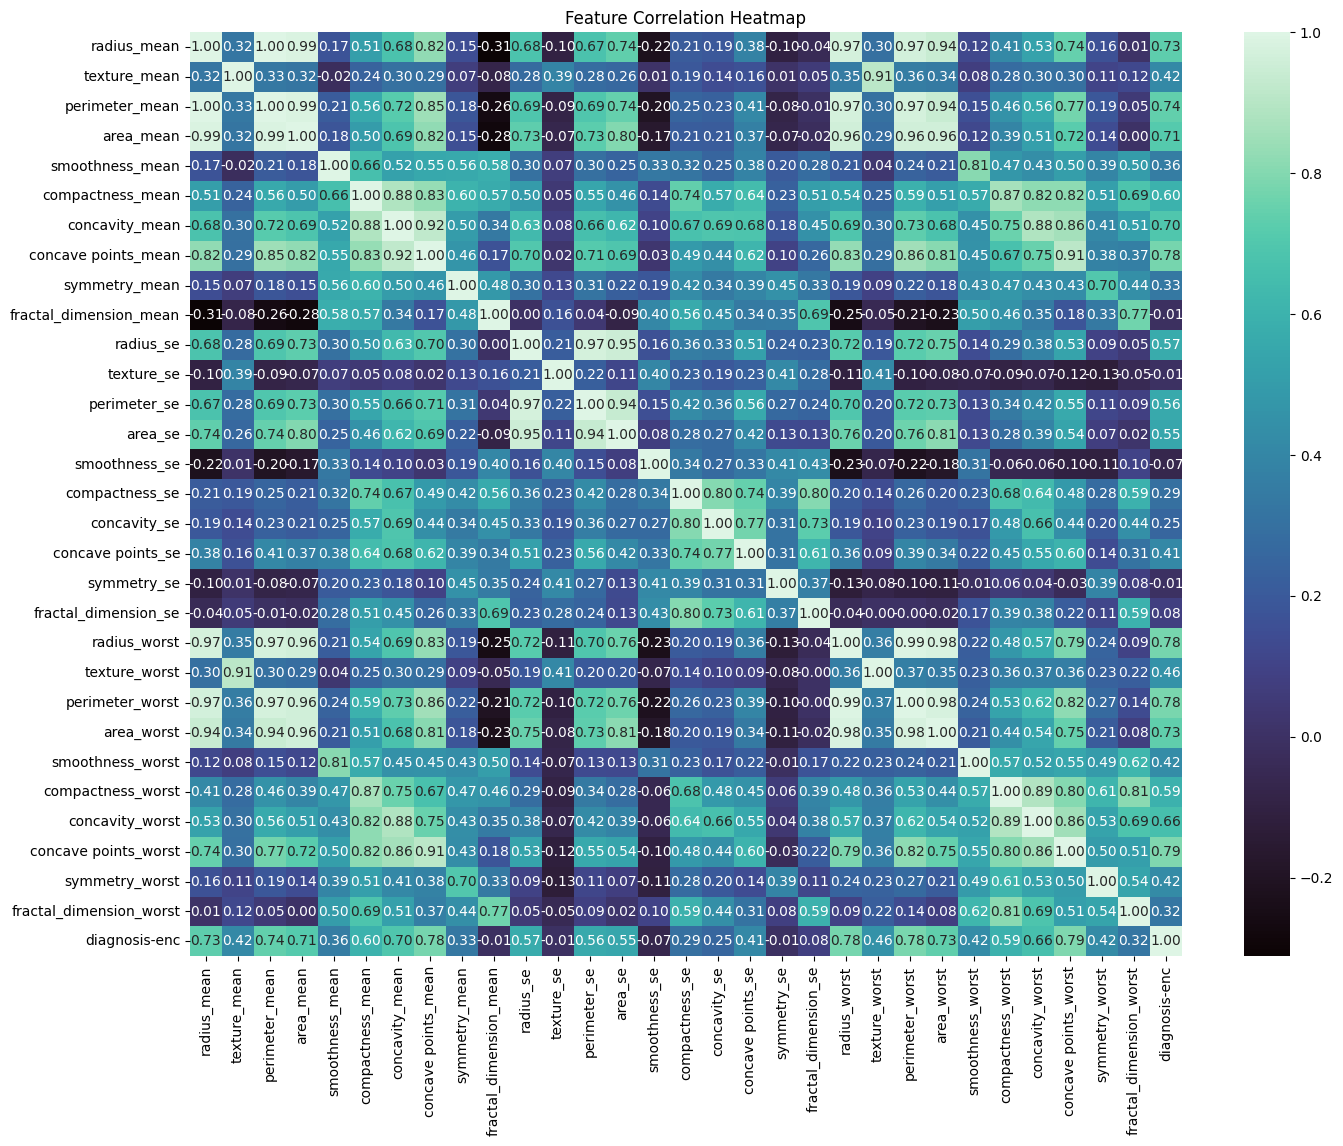

In [15]:
df_for_corr = df.drop(["diagnosis"], axis=1)

plt.figure(figsize=(16,12))
sns.heatmap(df_for_corr.corr(), cmap='mako', annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


* We have a lot of high correlated features. It can increase risk of Multicollinearity and overfitting.
* that suggest us to use tree-based models(RF, XGB)
* If we want to use other model we need to use some technics like PCA.

# Tree Based Models

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis-enc'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# copy df,just in case
tree_df = df.copy(deep=True)

#Making columns ready for training 
X = tree_df.drop(['diagnosis-enc','diagnosis'], axis=1)
y = tree_df['diagnosis-enc']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [18]:
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'gradient_boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'lightgbm': LGBMClassifier(random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

Training decision_tree...
Training random_forest...
Training gradient_boosting...
Training xgboost...
Training lightgbm...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [19]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

results = []

for name, model in models.items():
    print("Eval model:", name)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

df_results = pd.DataFrame(results)
print("\n=== Model Comparison Table ===")
print(df_results.sort_values(by='F1-score', ascending=False).to_string(index=False))


Eval model: decision_tree
              precision    recall  f1-score   support

           0      0.944     0.944     0.944        72
           1      0.905     0.905     0.905        42

    accuracy                          0.930       114
   macro avg      0.925     0.925     0.925       114
weighted avg      0.930     0.930     0.930       114

Confusion Matrix:
[[68  4]
 [ 4 38]]
Eval model: random_forest
              precision    recall  f1-score   support

           0      0.960     1.000     0.980        72
           1      1.000     0.929     0.963        42

    accuracy                          0.974       114
   macro avg      0.980     0.964     0.971       114
weighted avg      0.975     0.974     0.973       114

Confusion Matrix:
[[72  0]
 [ 3 39]]
Eval model: gradient_boosting
              precision    recall  f1-score   support

           0      0.947     1.000     0.973        72
           1      1.000     0.905     0.950        42

    accuracy              

* random forest is top performer(highest accuracy, recall, and F1).
* Gradient Boosting and LightGBM match each other, slightly behind Random Forest, but ahead of XGBoost.
* Decision Tree is outperformed by all ensemble methods, which is expected.

# feature importance

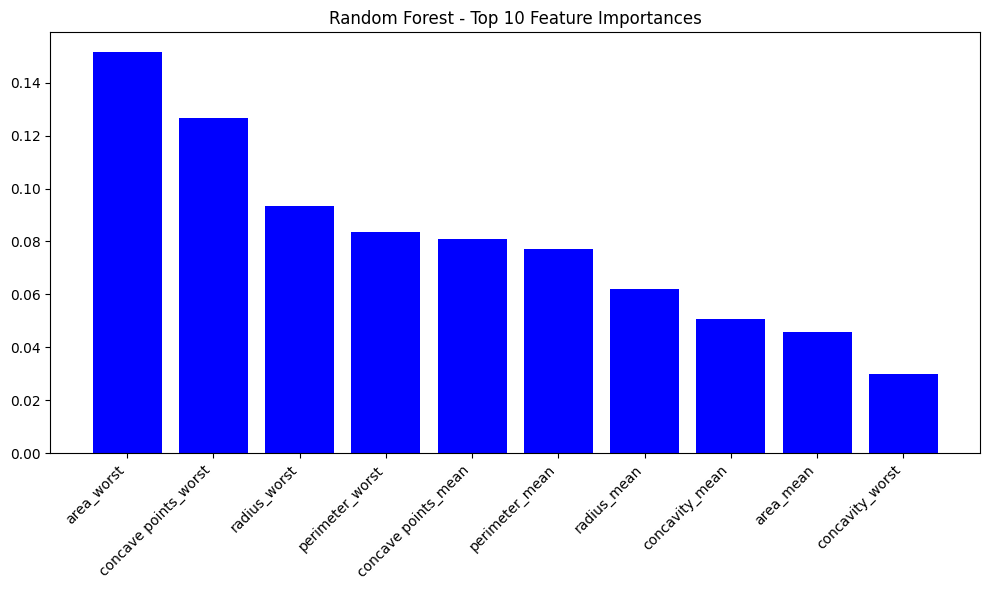

In [20]:
feature_names = X_train.columns

importances = models['random_forest'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random Forest - Top 10 Feature Importances")
plt.bar(range(10), importances[indices][:10], color="b", align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  Weighted Soft Voting Ensemble

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Define base models (already tuned or your existing ones)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
lgb = LGBMClassifier(random_state=42,verbose=-1)

# Cross-validation to get weights
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models_for_weighting = [('rf', rf), ('gb', gb), ('lgb', lgb)]

weights = []
for name, clf in models_for_weighting:
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1')
    weights.append(np.mean(scores))
print("Weights (F1 avg):", weights)

# Weighted soft voting
voting_soft = VotingClassifier(
    estimators=models_for_weighting,
    voting='soft',
    weights=weights
)
voting_soft.fit(X_train, y_train)
soft_preds = voting_soft.predict(X_test)
print("Soft Voting Ensemble F1:", f1_score(y_test, soft_preds))


Weights (F1 avg): [0.9519447457150247, 0.9552837817600958, 0.9548331783306209]
Soft Voting Ensemble F1: 0.9500000000000001


When each of  individual models (RF, GB, LGBM) is already very strong and similar, their errors are highly correlated.

So when  averaging them (especially with very close weights),  basically “blurring” predictions rather than correcting weaknesses, which can easily drop performance.

# Stacking with a linear/logistic meta‑learner

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Base estimators
rf = RandomForestClassifier(
    n_estimators=100, random_state=42
)
gb = GradientBoostingClassifier(
    n_estimators=100, random_state=42
)
lgb = LGBMClassifier(
    random_state=42, verbose=-1  # suppress warnings
)

# Stacking ensemble
stack_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('lgb', lgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    passthrough=False  # set True to give meta-model the original features too
)

# Train
stack_model.fit(X_train, y_train)

# Predict
stack_preds = stack_model.predict(X_test)

# Evaluation
print("=== Stacking Ensemble Report ===")
print(classification_report(y_test, stack_preds, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, stack_preds))


=== Stacking Ensemble Report ===
              precision    recall  f1-score   support

           0      0.947     1.000     0.973        72
           1      1.000     0.905     0.950        42

    accuracy                          0.965       114
   macro avg      0.974     0.952     0.961       114
weighted avg      0.967     0.965     0.965       114

Confusion Matrix:
[[72  0]
 [ 4 38]]


# Diversify the base models 

In [23]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Base models (you can replace with your tuned params)
rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=42, class_weight='balanced'
)
xgb = XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric='logloss', use_label_encoder=False,
    random_state=42
)
et = ExtraTreesClassifier(
    n_estimators=300, random_state=42, class_weight='balanced'
)
cat = CatBoostClassifier(
    iterations=300, learning_rate=0.05, depth=4,
    verbose=False, random_state=42
)

# Diverse stacking
stack_diverse = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('et', et),
        ('cat', cat)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    passthrough=False
)

# Train
stack_diverse.fit(X_train, y_train)

# Evaluate
stack_preds = stack_diverse.predict(X_test)
print("=== Diverse Stacking Ensemble Report ===")
print(classification_report(y_test, stack_preds, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, stack_preds))


=== Diverse Stacking Ensemble Report ===
              precision    recall  f1-score   support

           0      0.947     1.000     0.973        72
           1      1.000     0.905     0.950        42

    accuracy                          0.965       114
   macro avg      0.974     0.952     0.961       114
weighted avg      0.967     0.965     0.965       114

Confusion Matrix:
[[72  0]
 [ 4 38]]
